## importação de bibliotecas

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Análise exploratória

In [6]:
metadados = pd.read_excel(r"C:\Users\Documents\planodesaude\base_plano_de_saude.xlsx",sheet_name='Metadados')
dados = pd.read_excel(r"C:\Users\Documents\planodesaude\base_plano_de_saude.xlsx",sheet_name='base')

In [10]:
metadados
#explicação de cada variavel presente nos dados

,Variável,Descrição
0,Idade,Idade do colaborador
1,Sexo,Sexo do colaborador
2,IMC,Índice de Massa Corporal do colaborador
3,Qte_Filhos,Qte de filhos que o colaborador tem
4,Fumante,Flag se o colaborador é fumante ou não fumante
5,Região,Região do Brasil onde o colaborador mora
6,Custo_Saude,Custo de Plano de Saúde que esse colaborador t...


In [9]:
#dtype de cada coluna e preenchimento
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idade        1338 non-null   int64  
 1   Sexo         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   Qte_Filhos   1338 non-null   int64  
 4   Fumante      1338 non-null   object 
 5   Região       1338 non-null   object 
 6   Custo_Saude  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#retonrar as primeiras 10 linhas
dados.head(10)

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
0,19,Feminino,27.900,0,Sim,Centro,1688.492400
1,18,Masculino,33.770,1,Não,Sudeste,172.555230
2,28,Masculino,33.000,3,Não,Sudeste,444.946200
3,33,Masculino,22.705,0,Não,Norte,2198.447061
4,32,Masculino,28.880,0,Não,Norte,386.685520
5,31,Feminino,25.740,0,Não,Sudeste,375.662160
6,46,Feminino,33.440,1,Não,Sudeste,824.058960
7,37,Feminino,27.740,3,Não,Norte,728.150560
8,37,Masculino,29.830,2,Não,Nordeste,640.641070
9,60,Feminino,25.840,0,Não,Norte,2892.313692


In [14]:
#resumo das principais medidas
dados.describe()

,Idade,IMC,Qte_Filhos,Custo_Saude
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1327.042227
std,14.049960,6.098187,1.205493,1211.001124
min,18.000000,15.960000,0.000000,112.187390
25%,27.000000,26.296250,0.000000,474.028715
50%,39.000000,30.400000,1.000000,938.203300
75%,51.000000,34.693750,2.000000,1663.991252
max,64.000000,53.130000,5.000000,6377.042801


In [18]:
#gerando um df com a frequencia relativa e absoluta de cada coluna que é qualitativa (object)
def gerar_tabelas_frequencia(df, coluna):
    if df[coluna].dtype == 'O':  
        # Tabela de frequências absolutas
        frequencia_absoluta = df[coluna].value_counts()

        # Tabela de frequências relativas
        frequencia_relativa = df[coluna].value_counts(normalize=True)

        # Criando um DataFrame com as duas frequencias
        tabela_completa = pd.DataFrame({'Frequência Absoluta': frequencia_absoluta, 'Frequência Relativa': frequencia_relativa})

        return tabela_completa
    else:
        return None

In [19]:
gerar_tabelas_frequencia(dados,'Fumante')

,Frequência Absoluta,Frequência Relativa
Fumante,,
Não,1064,0.795217
Sim,274,0.204783


In [21]:
gerar_tabelas_frequencia(dados,'Região')

,Frequência Absoluta,Frequência Relativa
Região,,
Sudeste,364,0.272048
Centro,325,0.242900
Norte,325,0.242900
Nordeste,324,0.242152


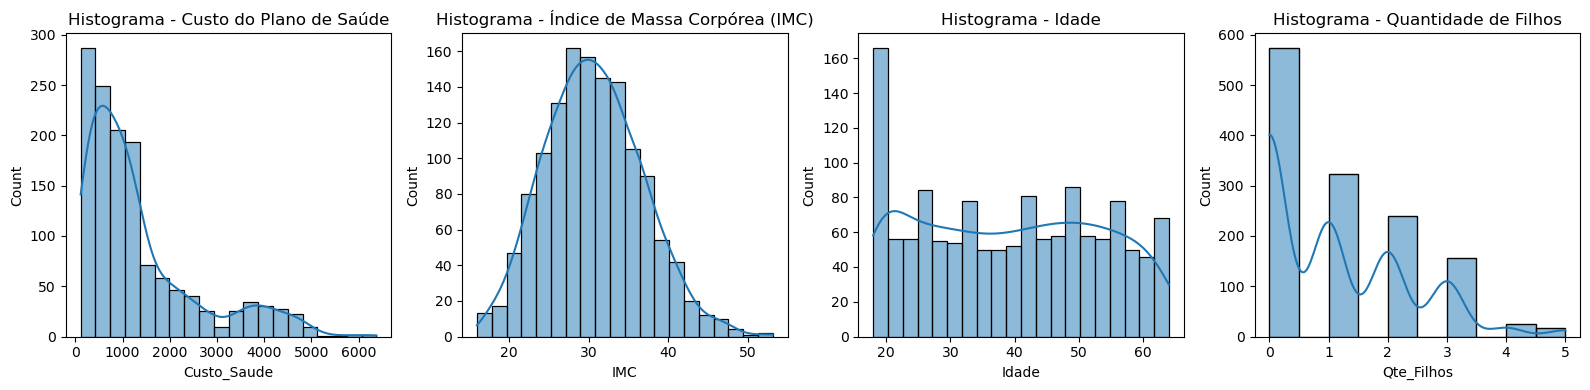

In [24]:
#gerando gráficos para variavies qualitativas

dados_quantitativos = dados[['Custo_Saude', 'IMC', 'Qte_Filhos', 'Idade']]

# Histogramas
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
sns.histplot(dados_quantitativos['Custo_Saude'], bins=20, kde=True)
plt.title('Histograma - Custo do Plano de Saúde')

plt.subplot(1, 4, 2)
sns.histplot(dados_quantitativos['IMC'], bins=20, kde=True)
plt.title('Histograma - Índice de Massa Corpórea (IMC)')

plt.subplot(1, 4, 3)
sns.histplot(dados_quantitativos['Idade'], bins=20, kde=True)
plt.title('Histograma - Idade')

plt.subplot(1, 4, 4)
sns.histplot(dados_quantitativos['Qte_Filhos'], bins=10, kde=True)
plt.title('Histograma - Quantidade de Filhos')

plt.tight_layout()
plt.show()


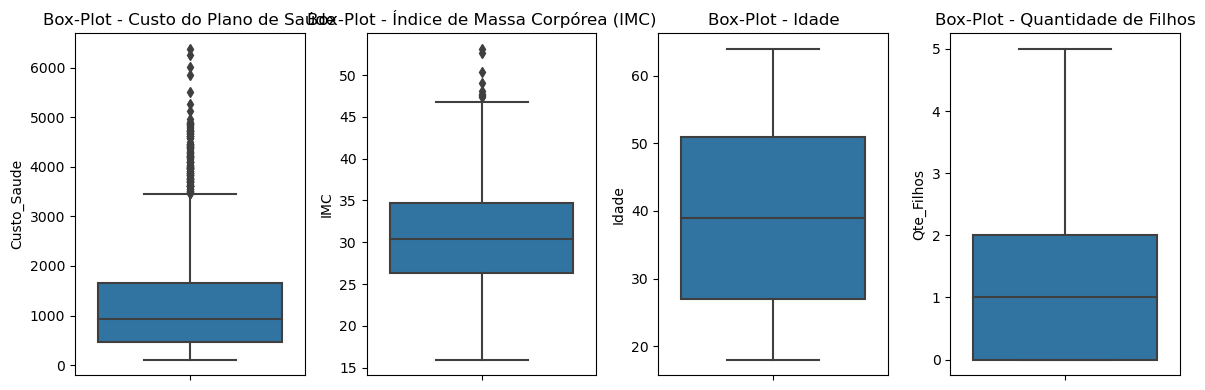

In [26]:
# Box-Plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
sns.boxplot(y=dados_quantitativos['Custo_Saude'])
plt.title('Box-Plot - Custo do Plano de Saúde')

plt.subplot(1, 4, 2)
sns.boxplot(y=dados_quantitativos['IMC'])
plt.title('Box-Plot - Índice de Massa Corpórea (IMC)')

plt.subplot(1, 4, 3)
sns.boxplot(y=dados_quantitativos['Idade'])
plt.title('Box-Plot - Idade')

plt.subplot(1, 4, 4)
sns.boxplot(y=dados_quantitativos['Qte_Filhos'])
plt.title('Box-Plot - Quantidade de Filhos')

plt.tight_layout()
plt.show()

## Análise de Correlação

In [49]:
#faixa de IMC baseada nas politicas publicas
faixas_imc = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
categorias_imc = ['Abaixo do Peso', 'Peso Normal', 'Sobrepeso', 'Obesidade I', 'Obesidade II', 'Obesidade III']
dados_quantitativos['Faixa_IMC'] = pd.cut(dados_quantitativos['IMC'], bins=faixas_imc, labels=categorias_imc, right=False)
print(dados_quantitativos[['IMC', 'Faixa_IMC']].head())
dados['Faixa_IMC'] = pd.cut(dados['IMC'], bins=faixas_imc, labels=categorias_imc, right=False)

      IMC    Faixa_IMC
0  27.900    Sobrepeso
1  33.770  Obesidade I
2  33.000  Obesidade I
3  22.705  Peso Normal
4  28.880    Sobrepeso


C:\Users\Nexodata\AppData\Local\Temp\ipykernel_27924\2000697463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_quantitativos['Faixa_IMC'] = pd.cut(dados_quantitativos['IMC'], bins=faixas_imc, labels=categorias_imc, right=False)


In [52]:
# Correlação linear
dados_quantitativos = dados[['Custo_Saude', 'Qte_Filhos', 'Idade', 'Fumante', 'Sexo', 'Região','Faixa_IMC']]

# Criar variáveis dummy para as variáveis categóricas
X = pd.get_dummies(dados_quantitativos[['Qte_Filhos', 'Idade', 'Fumante', 'Sexo', 'Região','Faixa_IMC']], 
                   columns=['Fumante', 'Sexo', 'Região','Faixa_IMC'])

# Adicionar variáveis quantitativas ao DataFrame X
X[['Custo_Saude']] = dados_quantitativos[['Custo_Saude']]

# Calcular a matriz de correlação
correlacao_custo = X.corr()['Custo_Saude']

print("Correlação Linear entre Custo_Saude e Variáveis Dummy:")
print(correlacao_custo)


Correlação Linear entre Custo_Saude e Variáveis Dummy:
Qte_Filhos                  0.067998
Idade                       0.299008
Fumante_Não                -0.787251
Fumante_Sim                 0.787251
Sexo_Feminino              -0.057292
Sexo_Masculino              0.057292
Região_Centro              -0.043210
Região_Nordeste             0.006349
Região_Norte               -0.039905
Região_Sudeste              0.073982
Faixa_IMC_Abaixo do Peso   -0.044960
Faixa_IMC_Peso Normal      -0.106512
Faixa_IMC_Sobrepeso        -0.115902
Faixa_IMC_Obesidade I       0.045726
Faixa_IMC_Obesidade II      0.145833
Faixa_IMC_Obesidade III     0.084753
Custo_Saude                 1.000000
Name: Custo_Saude, dtype: float64


In [54]:
# Coeficiente de Determinação (R²) - testando todas as variaveis juntas
X = pd.get_dummies(pd.get_dummies(dados_quantitativos[['Qte_Filhos', 'Idade', 'Fumante', 'Sexo', 'Região','Faixa_IMC']], 
                   columns=['Fumante', 'Sexo', 'Região','Faixa_IMC']))
                   
y = dados_quantitativos['Custo_Saude']

#dividir em treinamento e teste sendo o tamanho do teste 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")

Coeficiente de Determinação (R²): 0.7791788796370387


In [55]:
# Lista de variáveis explicativas
variaveis_explicativas = ['Qte_Filhos', 'Idade', 'Fumante', 'Sexo', 'Região','Faixa_IMC']

# Lfazer o r2 para cada varivel
for variavel in variaveis_explicativas:
    # Cria X usando apenas a variável iterada
    X_variavel = pd.get_dummies(dados_quantitativos[[variavel]], columns=[variavel])
    
    #dividir em treinamento e teste sendo o tamanho do teste 20%
    X_train_variavel, X_test_variavel, y_train_variavel, y_test_variavel = train_test_split(X_variavel, y, test_size=0.2, random_state=42)
    
    # Cria e ajusta o modelo
    modelo_variavel = LinearRegression()
    modelo_variavel.fit(X_train_variavel, y_train_variavel)
    y_pred_variavel = modelo_variavel.predict(X_test_variavel)
    r2_variavel = r2_score(y_test_variavel, y_pred_variavel)
    print(f"Coeficiente de Determinação (R²) para {variavel}: {r2_variavel}")


Coeficiente de Determinação (R²) para Qte_Filhos: 0.005380908218862612
Coeficiente de Determinação (R²) para Idade: 0.08875176443312427
Coeficiente de Determinação (R²) para Fumante: 0.6602486589056529
Coeficiente de Determinação (R²) para Sexo: 0.002612126063356701
Coeficiente de Determinação (R²) para Região: 0.012147563526654137
Coeficiente de Determinação (R²) para Faixa_IMC: 0.036374169818346624


## Regressao linear múltipla

In [56]:
# Regressão Linear Múltipla
modelo_geral = LinearRegression()
modelo_geral.fit(X, y)

coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo_geral.coef_
})
print("Coeficientes da Regressão Linear Múltipla:")
print(coeficientes)

Coeficientes da Regressão Linear Múltipla:
                    Variável  Coeficiente
0                 Qte_Filhos    50.134969
1                      Idade    25.570336
2                Fumante_Não -1191.436476
3                Fumante_Sim  1191.436476
4              Sexo_Feminino     6.754740
5             Sexo_Masculino    -6.754740
6              Região_Centro   -41.428012
7            Região_Nordeste    57.366819
8               Região_Norte    17.031781
9             Região_Sudeste   -32.970588
10  Faixa_IMC_Abaixo do Peso  -371.115642
11     Faixa_IMC_Peso Normal  -254.154402
12       Faixa_IMC_Sobrepeso  -151.663562
13     Faixa_IMC_Obesidade I   160.014187
14    Faixa_IMC_Obesidade II   315.353603
15   Faixa_IMC_Obesidade III   301.565816
